In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from intersect import intersection

In [102]:
def trend_line(x, y, degree=1):
  coeffs = np.polyfit(x, y, degree)
  poly = np.poly1d(coeffs)
  y_trend = poly(x)
  return coeffs, y_trend

In [103]:
frame_raw = pd.read_csv("../data/elektromagnetyzm_202/jałowy.csv")
frame_load = pd.read_csv("../data/elektromagnetyzm_202/obciążenie.csv")
frame_short = pd.read_csv("../data/elektromagnetyzm_202/zwarcie.csv")

In [104]:
raw_600 = frame_raw[frame_raw["n2"] == 600]
raw_400 = frame_raw[frame_raw["n2"] == 400]
raw_200 = frame_raw[frame_raw["n2"] == 200]

In [105]:
trend_600 = trend_line(raw_600['u1'], raw_600['u2'])
trend_400 = trend_line(raw_400['u1'], raw_400['u2'])
trend_200 = trend_line(raw_200['u1'], raw_200['u2'])

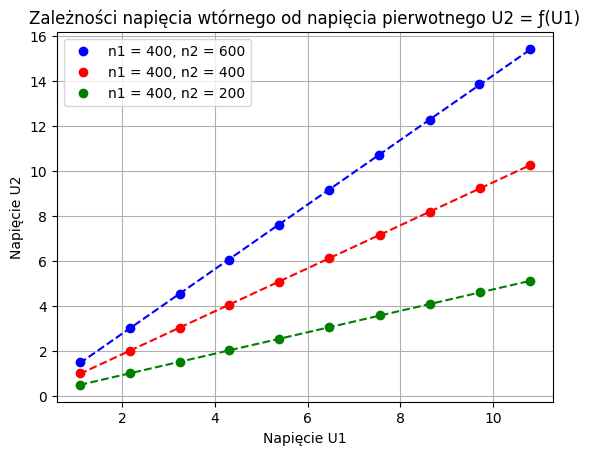

In [106]:
plt.plot(raw_600['u1'], raw_600['u2'], "bo", label="n1 = 400, n2 = 600")
plt.plot(raw_400['u1'], raw_400['u2'], "ro", label="n1 = 400, n2 = 400")
plt.plot(raw_200['u1'], raw_200['u2'], "go", label="n1 = 400, n2 = 200")
plt.plot(raw_600['u1'], trend_600[1], "b--")
plt.plot(raw_400['u1'], trend_400[1], "r--")
plt.plot(raw_200['u1'], trend_200[1], "g--")
plt.grid()
plt.title("Zależności napięcia wtórnego od napięcia pierwotnego U2 = ƒ(U1)")
plt.xlabel("Napięcie U1")
plt.ylabel("Napięcie U2")
plt.legend()
plt.show()
plt.close()

In [107]:
short_600 = frame_short[frame_short["n2"] == 600]
short_400 = frame_short[frame_short["n2"] == 400]
short_200 = frame_short[frame_short["n2"] == 200]

In [108]:
trend_600 = trend_line(short_600['i1'], short_600['i2'])
trend_400 = trend_line(short_400['i1'], short_400['i2'])
trend_200 = trend_line(short_200['i1'], short_200['i2'])

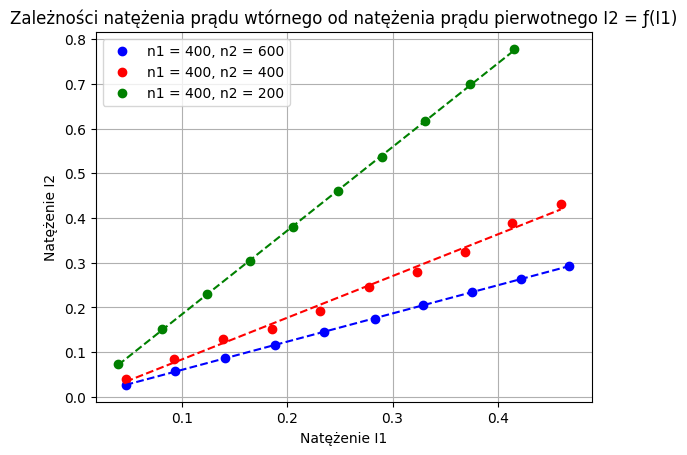

In [109]:
plt.plot(short_600['i1'], short_600['i2'], "bo", label="n1 = 400, n2 = 600")
plt.plot(short_400['i1'], short_400['i2'], "ro", label="n1 = 400, n2 = 400")
plt.plot(short_200['i1'], short_200['i2'], "go", label="n1 = 400, n2 = 200")
plt.plot(short_600['i1'], trend_600[1], "b--")
plt.plot(short_400['i1'], trend_400[1], "r--")
plt.plot(short_200['i1'], trend_200[1], "g--")
plt.grid()
plt.title("Zależności natężenia prądu wtórnego od natężenia prądu pierwotnego I2 = ƒ(I1)")
plt.xlabel("Natężenie I1")
plt.ylabel("Natężenie I2")
plt.legend()
plt.show()
plt.close()

In [110]:
trend_load = trend_line(frame_load['i2'], frame_load['u2'], 2)

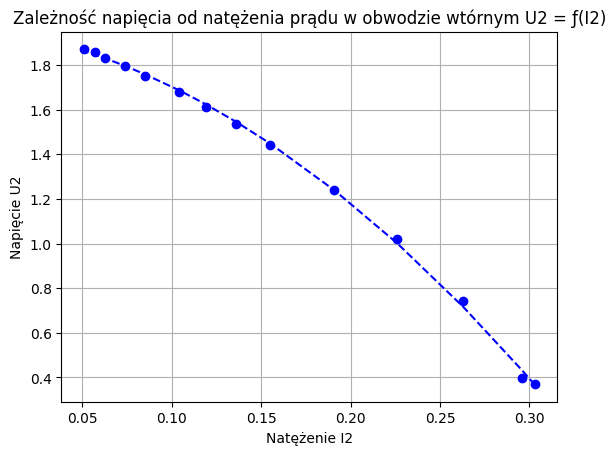

In [111]:
plt.plot(frame_load['i2'], frame_load['u2'], "bo")
plt.plot(frame_load['i2'], trend_load[1], "b--")
plt.grid()
plt.title("Zależność napięcia od natężenia prądu w obwodzie wtórnym U2 = ƒ(I2)")
plt.xlabel("Natężenie I2")
plt.ylabel("Napięcie U2")
plt.show()
plt.close()

In [112]:
load_u_in = frame_load['u1']
load_u_out = frame_load['u2']

load_i_in = frame_load['i1']
load_i_out = frame_load['i2']

load_p_in = []
for i in range(len(load_u_in)):
  load_p_in.append(load_i_in[i] * load_u_in[i])
  
load_p_out = []
for i in range(len(load_u_out)):
  load_p_out.append(load_i_out[i] * load_u_out[i])
  
load_efficiency = []
for i in range(len(load_p_in)):
  load_efficiency.append(load_p_out[i] / load_p_in[i])

In [118]:
efficiency_trend = trend_line(load_i_out, load_efficiency, 2)

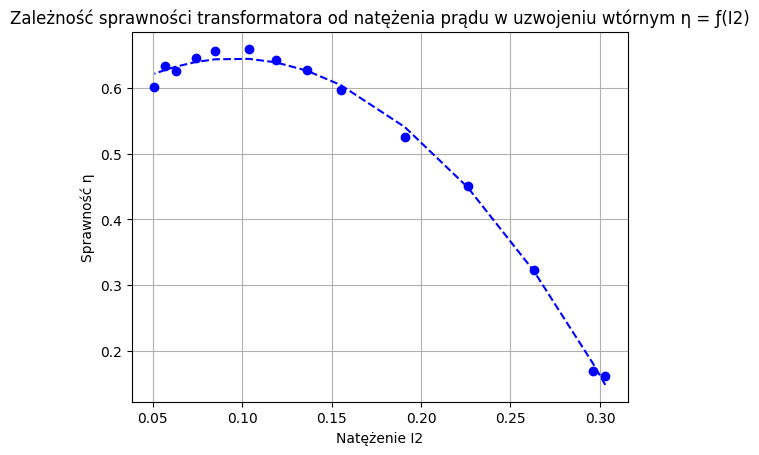

In [ ]:
plt.plot(load_i_out, load_efficiency, "bo")
plt.plot(frame_load['i2'], efficiency_trend[1], "b--")
plt.grid()
plt.title("Zależność sprawności transformatora od natężenia prądu w uzwojeniu wtórnym η = ƒ(I2)")
plt.xlabel("Natężenie I2")
plt.ylabel("Sprawność η")
plt.show()
plt.close()